In [ ]:
pip install citipy

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"


In [5]:
# Set up lists to hold response values
city_with_data = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
cities_to_remove = []

print("Beginning Data Retrieval")
print("--------------------------------------")

# Loop through the list of cities and perform a request for the data of each cities
for city in range(len(cities)):
    query_url = url + "appid=" + api_key + "&q=" + cities[city]
    response = requests.get(query_url)
    response_json = response.json()
    
    try:
        # Collect the weather data for each cities
        city_with_data.append(response_json["name"])
        cloudiness.append(response_json["clouds"]["all"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        humidity.append(response_json["main"]["humidity"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        wind_speed.append(response_json["wind"]["speed"])
        
        # Print the log for each cities
        print(f"Processing Record {city} | {cities[city]}")
        
    except (KeyError, IndexError):
        print(f"Processing Record {city} | {cities[city]}")
        print("City not found. Skipping...")


print("--------------------------------------")
print("Data Retrival Complete")
print("--------------------------------------")

Beginning Data Retrieval
--------------------------------------
Processing Record 0 | qaanaaq
Processing Record 1 | kapaa
Processing Record 2 | port-cartier
Processing Record 3 | san luis de la paz
Processing Record 4 | huarmey
Processing Record 5 | marzuq
Processing Record 6 | hami
Processing Record 7 | mahebourg
Processing Record 8 | port alfred
Processing Record 9 | atuona
Processing Record 10 | maturin
Processing Record 11 | pisco
Processing Record 12 | bongued
Processing Record 13 | chanika
Processing Record 14 | podosinovets
Processing Record 15 | hasaki
Processing Record 16 | yellowknife
Processing Record 17 | paracatu
Processing Record 18 | puerto ayora
Processing Record 19 | wawa
Processing Record 20 | tura
Processing Record 21 | luxor
Processing Record 22 | avarua
Processing Record 23 | kadykchan
City not found. Skipping...
Processing Record 24 | laguna
Processing Record 25 | caravelas
Processing Record 26 | longyearbyen
Processing Record 27 | attawapiskat
City not found. Ski

Processing Record 231 | provideniya
Processing Record 232 | talnakh
Processing Record 233 | sorong
Processing Record 234 | andapa
Processing Record 235 | acapulco
Processing Record 236 | torata
Processing Record 237 | samarai
Processing Record 238 | ostrovnoy
Processing Record 239 | kiama
Processing Record 240 | streamwood
Processing Record 241 | texarkana
Processing Record 242 | griffith
Processing Record 243 | grand river south east
City not found. Skipping...
Processing Record 244 | mar del plata
Processing Record 245 | santander
Processing Record 246 | tikhvin
Processing Record 247 | santa cruz
Processing Record 248 | denpasar
Processing Record 249 | hithadhoo
Processing Record 250 | tarakan
Processing Record 251 | bogorodskoye
Processing Record 252 | peru
Processing Record 253 | cidreira
Processing Record 254 | rocha
Processing Record 255 | meulaboh
Processing Record 256 | gurupa
City not found. Skipping...
Processing Record 257 | rungata
City not found. Skipping...
Processing Rec

Processing Record 452 | nipawin
Processing Record 453 | turtkul
City not found. Skipping...
Processing Record 454 | oriximina
Processing Record 455 | yelizovo
Processing Record 456 | port elizabeth
Processing Record 457 | rondonopolis
Processing Record 458 | tucumcari
Processing Record 459 | lavrentiya
Processing Record 460 | diu
Processing Record 461 | concepcion del uruguay
Processing Record 462 | kamiiso
Processing Record 463 | mys shmidta
City not found. Skipping...
Processing Record 464 | bathsheba
Processing Record 465 | shatalovo
Processing Record 466 | porbandar
Processing Record 467 | sindor
Processing Record 468 | kismayo
City not found. Skipping...
Processing Record 469 | kodyma
Processing Record 470 | kapit
Processing Record 471 | amapa
Processing Record 472 | khorramshahr
Processing Record 473 | nabire
Processing Record 474 | mabaruma
Processing Record 475 | nouakchott
Processing Record 476 | mugur-aksy
Processing Record 477 | palmerston
Processing Record 478 | marti
Proce

In [7]:
# Print the number of each data we collected from the API for each cities
print(f"Number of City: {len(city_with_data)}")
print(f"Number of Cloudiness: {len(cloudiness)}")
print(f"Number of Country: {len(country)}")
print(f"Number of Date: {len(date)}")
print(f"Number of Humidity: {len(humidity)}")
print(f"Number of Latitude: {len(lat)}")
print(f"Number of Longitude: {len(lng)}")
print(f"Number of Max Temperature: {len(max_temp)}")
print(f"Number of Wind Speed: {len(wind_speed)}")

Number of City: 555
Number of Cloudiness: 555
Number of Country: 555
Number of Date: 555
Number of Humidity: 555
Number of Latitude: 555
Number of Longitude: 555
Number of Max Temperature: 555
Number of Wind Speed: 555


## Convert Raw Data to DataFrame

- Export the city data into a .csv.
- Display the DataFrame

In [8]:
# Create DataFrame
weather_data = pd.DataFrame({
    "City": city_with_data,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Maximum Temperature": max_temp,
    "Wind Speed": wind_speed
})
weather_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,Qaanaaq,100,GL,1578094154,96,77.48,-69.36,232.37,2.39
1,Kapaa,75,US,1578094154,69,22.08,-159.32,299.15,8.20
2,Port-Cartier,90,CA,1578093930,79,50.03,-66.88,267.59,0.70
3,San Luis de la Paz,76,MX,1578094155,19,21.30,-100.52,294.26,3.13
4,Huarmey,86,PE,1578094118,75,-10.07,-78.15,294.59,2.27
...,...,...,...,...,...,...,...,...,...
550,Deputatskiy,6,RU,1578094282,95,69.30,139.90,244.19,1.19
551,Tromso,75,NO,1578094282,91,69.65,18.96,273.15,6.70
552,Port Macquarie,0,AU,1578094282,45,-31.43,152.91,304.15,2.10
553,Sao Joao da Barra,98,BR,1578094282,90,-21.64,-41.05,297.66,2.75


In [9]:
# Export the data frame to csv file
weather_data.to_csv("weather_data_03Jan2020.csv")

## Plotting the Data
- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

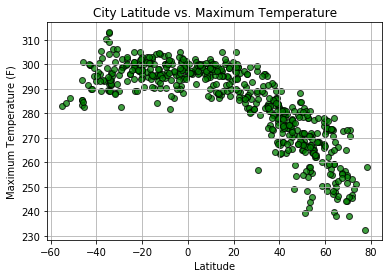

In [11]:
# Assign x values and y values for the scatter plot between latitude and max temperature
x_values = weather_data["Latitude"]
y_values = weather_data["Maximum Temperature"]

# Create the scatter plot
plt.scatter(x_values.astype(float), y_values, marker="o", facecolor="green", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Latitude vs. Maximum Temperature")
plt.grid()

# Save the image of the scatter plot in "Images" folder
plt.savefig("./Images/lat_vs_temp_03Jan2020.png")

plt.show()

#### Latitude vs. Humidity Plot

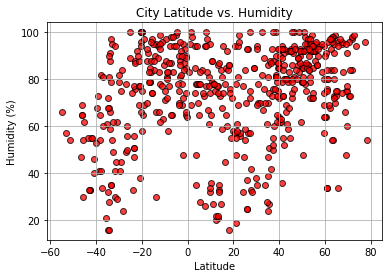

In [12]:
# Assign x values and y values for the scatter plot between latitude and max temperature
x_values = weather_data["Latitude"]
y_values = weather_data["Humidity"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o", facecolor="red", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the image of the scatter plot in "Images" folder
plt.savefig("./Images/lat_vs_humidity_03Jan2020.png")

plt.show()

#### Latitude vs. Cloudiness Plot

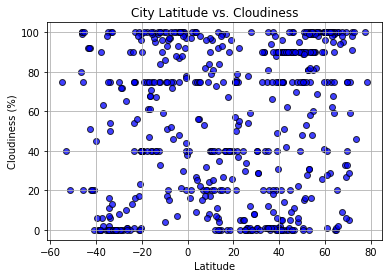

In [13]:
# Assign x values and y values for the scatter plot between latitude and max temperature
x_values = weather_data["Latitude"]
y_values = weather_data["Cloudiness"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o", facecolor="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the image of the scatter plot in "Images" folder
plt.savefig("./Images/lat_vs_cloudiness_03Jan2020.png")

plt.show()

#### Latitude vs. Wind Speed Plot

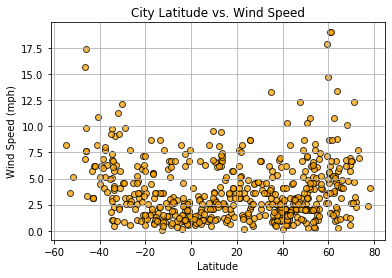

In [14]:
# Assign x values and y values for the scatter plot between latitude and max temperature
x_values = weather_data["Latitude"]
y_values = weather_data["Wind Speed"]

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o", facecolor="orange", edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the image of the scatter plot in "Images" folder
plt.savefig("./Images/lat_vs_wind_03Jan2020.png")

plt.show()